In [40]:
# packages to store and manipulate data
import numpy as np
import pandas as pd
from pprint import pprint

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")

# packages for visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# package to clean text
import nltk; nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re

# spacy for lemmatization
import spacy
nlp = spacy.load("en_core_web_sm")

# gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

# sentiment
from textblob import TextBlob
from nltk.corpus import subjectivity
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import textblob
# rule based method for sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\607791\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Import Time-series Dataset, Last Updated on 3/20/2020
# Kaggle COVID Datasource: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

# Patient case sumamry
df1 = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum II COVID-19/COVID19_line_list_data.csv')
df1.head()

,id,case_in_country,reporting date,Unnamed: 3,summary,location,country,gender,age,symptom_onset,...,recovered,symptom,source,link,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,1,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,...,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,1/20/2020,NaN,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,...,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,1/21/2020,NaN,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,...,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,1/21/2020,NaN,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,...,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1.shape

(1085, 27)

In [4]:
df1 = df1.drop(['source'], axis=1)
df1 = df1.drop(['link'], axis=1)
df1 = df1.drop(['Unnamed: 3'], axis=1)
df1 = df1.drop(['Unnamed: 21'], axis=1)
df1 = df1.drop(['Unnamed: 22'], axis=1)
df1 = df1.drop(['Unnamed: 23'], axis=1)
df1 = df1.drop(['Unnamed: 24'], axis=1)
df1 = df1.drop(['Unnamed: 25'], axis=1)
df1 = df1.drop(['Unnamed: 26'], axis=1)
df1 = df1.drop(['case_in_country'], axis=1)
df1 = df1.drop(['If_onset_approximated'], axis=1)
df1 = df1.drop(['id'], axis=1)
df1.shape

(1085, 15)

In [5]:
df1['gender'] = df1['gender'].map({'female': 1, 'male': 0})

df1['death'] = df1.death.apply(lambda x: np.where(x.isdigit(),x,'0'))
        
df1['recovered'] = df1.recovered.apply(lambda x: np.where(x.isdigit(),x,'0'))
        
#allowed_vals = ['0','1']
#df1.loc[~df1["death"].isin(allowed_vals), "S"] = ""
#df1.loc[~df1["recovered"].isin(allowed_vals), "S"] = ""

In [6]:
df1.head()

,reporting date,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,0.0,66.0,01/03/20,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN
1,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,1.0,56.0,1/15/2020,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN
2,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,0.0,46.0,01/04/20,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN
3,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,1.0,60.0,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,0.0,58.0,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


In [7]:
df1.to_csv(index=False)

'reporting date,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom\r\n1/20/2020,"First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.","Shenzhen, Guangdong",China,0.0,66.0,01/03/20,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,\r\n1/20/2020,"First confirmed imported COVID-19 pneumonia patient in Shanghai (from Wuhan): female, 56, Wuhan residence, arrived in Shanghai from Wuhan on 01/12/2020, symptom onset and visited fever clinic on 01/15/2020, laboratory confirmed on 01/20/2020",Shanghai,China,1.0,56.0,1/15/2020,1/15/2020,,01/12/20,0,1.0,0,0,\r\n1/21/2020

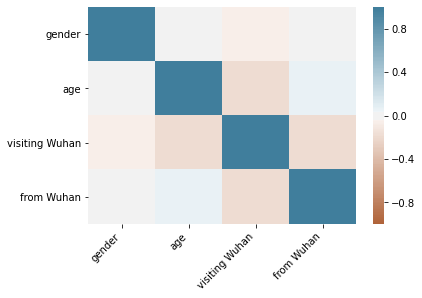

In [8]:
# initial correlation plot
correlation = df1.corr()
axis = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(30, 230, n=200)
)
axis.set_xticklabels(
    axis.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

C:\Users\607791\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\607791\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


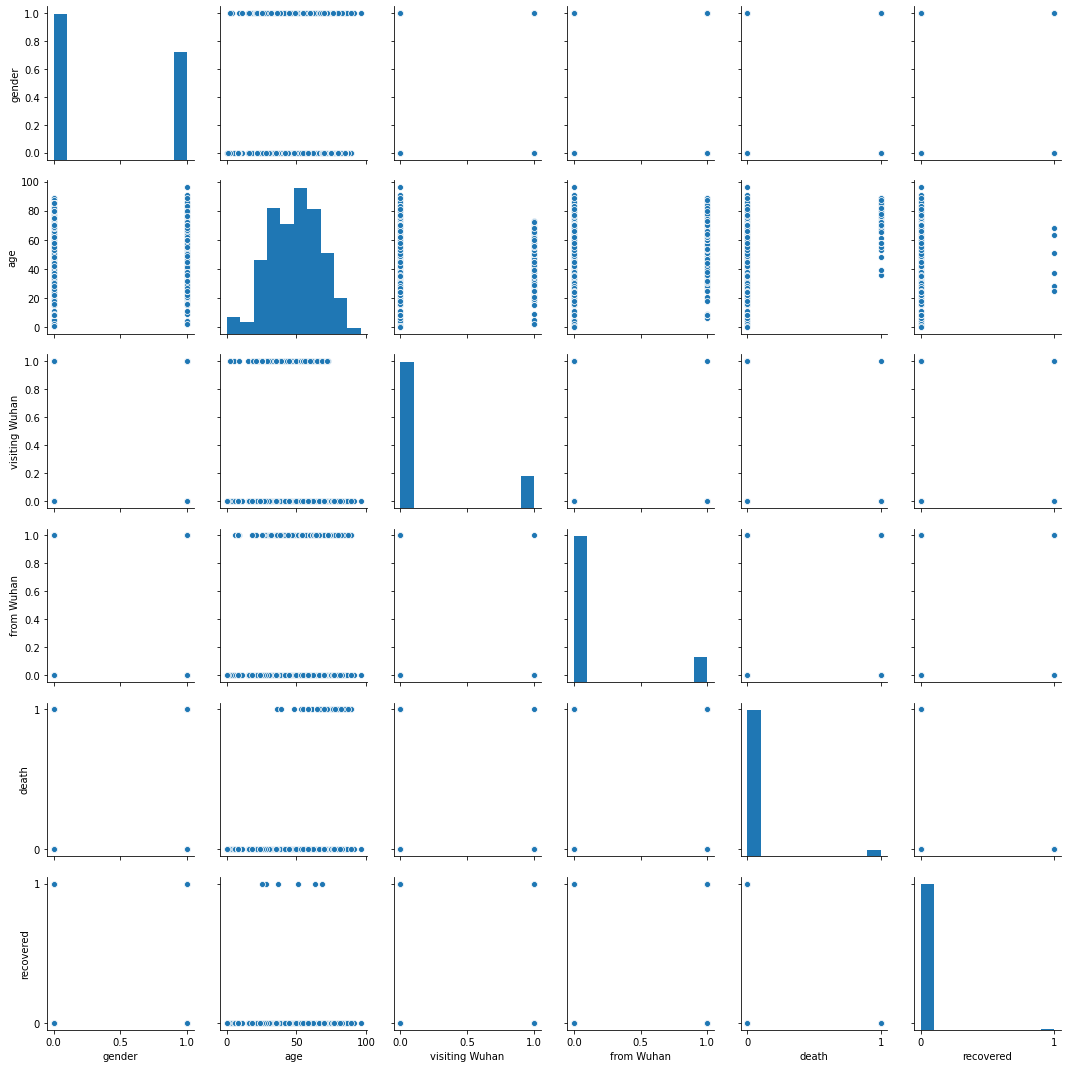

In [9]:
# variable pair plot
sns.pairplot(df1);

# all the "1"s for death have a high age score

In [10]:
# Age, sex, disease, symptoms
df2 = pd.read_csv('C:/Users/607791/Desktop/DS/Practicum II COVID-19/COVID19_open_line_list.csv')
df2.shape

(14126, 45)

In [11]:
df2 = df2.drop(['source'], axis=1)
df2 = df2.drop(['sequence_available'], axis=1)
df2 = df2.drop(['reported_market_exposure'], axis=1)
df2 = df2.drop(['date_death_or_discharge'], axis=1)
df2 = df2.drop(['notes_for_discussion'], axis=1)
df2 = df2.drop(['location'], axis=1)
#df2 = df2.drop(['admin3'], axis=1)
df2 = df2.drop(['admin2'], axis=1)
df2 = df2.drop(['admin1'], axis=1)
df2 = df2.drop(['admin_id'], axis=1)
df2 = df2.drop(['admin3'], axis=1)
df2 = df2.drop(['data_moderator_initials'], axis=1)
df2 = df2.drop(['province'], axis=1)
df2 = df2.drop(['city'], axis=1)
df2 = df2.drop(['ID'], axis=1)
df2 = df2.drop(['latitude'], axis=1)
df2 = df2.drop(['longitude'], axis=1)
df2 = df2.drop(['geo_resolution'], axis=1)
df2 = df2.drop(['date_onset_symptoms'], axis=1)
df2 = df2.drop(['date_admission_hospital'], axis=1)
df2 = df2.drop(['date_confirmation'], axis=1)
df2 = df2.drop(['lives_in_Wuhan'], axis=1)
df2 = df2.drop(['travel_history_dates'], axis=1)
df2 = df2.drop(['additional_information'], axis=1)
df2 = df2.drop(['Unnamed: 33'], axis=1)
df2 = df2.drop(['Unnamed: 34'], axis=1)
df2 = df2.drop(['Unnamed: 35'], axis=1)
df2 = df2.drop(['Unnamed: 36'], axis=1)
df2 = df2.drop(['Unnamed: 37'], axis=1)
df2 = df2.drop(['Unnamed: 38'], axis=1)
df2 = df2.drop(['Unnamed: 39'], axis=1)
df2 = df2.drop(['Unnamed: 40'], axis=1)
df2 = df2.drop(['Unnamed: 41'], axis=1)
df2 = df2.drop(['Unnamed: 42'], axis=1)
df2 = df2.drop(['Unnamed: 43'], axis=1)
df2 = df2.drop(['Unnamed: 44'], axis=1)
df2.shape

(14126, 10)

In [12]:
df2.head()

,age,sex,country,wuhan(0)_not_wuhan(1),symptoms,travel_history_location,chronic_disease_binary,chronic_disease,outcome,country_new
0,30,male,China,1.0,NaN,Wuhan,NaN,NaN,NaN,China
1,47,male,China,1.0,NaN,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,China
2,49,male,China,1.0,NaN,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,China
3,47,female,China,1.0,NaN,NaN,NaN,NaN,NaN,China
4,50,female,China,1.0,NaN,Wuhan,NaN,NaN,NaN,China


In [13]:
# clean text function
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # pronouns stay, rest lemmatized
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs]
    
    # join tokens back into doc
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [14]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords = set(stopwords + ['use', 'make', 'see', 'how', 'go', 'say', 'ask', 'get'])

In [15]:
df1.head()

,reporting date,summary,location,country,gender,age,symptom_onset,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom
0,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,0.0,66.0,01/03/20,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN
1,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,1.0,56.0,1/15/2020,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN
2,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,0.0,46.0,01/04/20,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN
3,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,1.0,60.0,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN
4,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,0.0,58.0,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN


In [16]:
df_sum = df1.filter(['summary','country'], axis=1)
df_sum=df_sum.dropna()
df_sum.columns = ["summary",'country']
df_sum.shape

(1080, 2)

In [17]:
df_sum

,summary,country
0,First confirmed imported COVID-19 pneumonia pa...,China
1,First confirmed imported COVID-19 pneumonia pa...,China
2,First confirmed imported cases in Zhejiang: pa...,China
3,new confirmed imported COVID-19 pneumonia in T...,China
4,new confirmed imported COVID-19 pneumonia in T...,China
5,First confirmed imported COVID-19 pneumonia pa...,China
6,First confirmed imported COVID-19 pneumonia pa...,China
7,new confirmed imported COVID-19 pneumonia pati...,China
8,new confirmed imported COVID-19 pneumonia pati...,China
9,new confirmed imported COVID-19 pneumonia pati...,China


In [18]:
import string
# list

data = df_sum.summary.values.tolist()

data = clean_text(data)

clean_summary = data

removing punctuation and digits
spacy nlp...
getting lemmas
removing stopwords


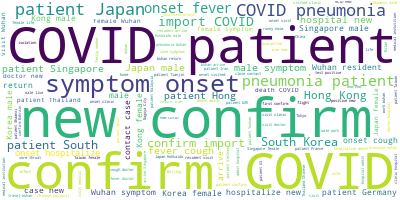

In [19]:
# wordcloud
from wordcloud import WordCloud
long_string = ','.join(list(data))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

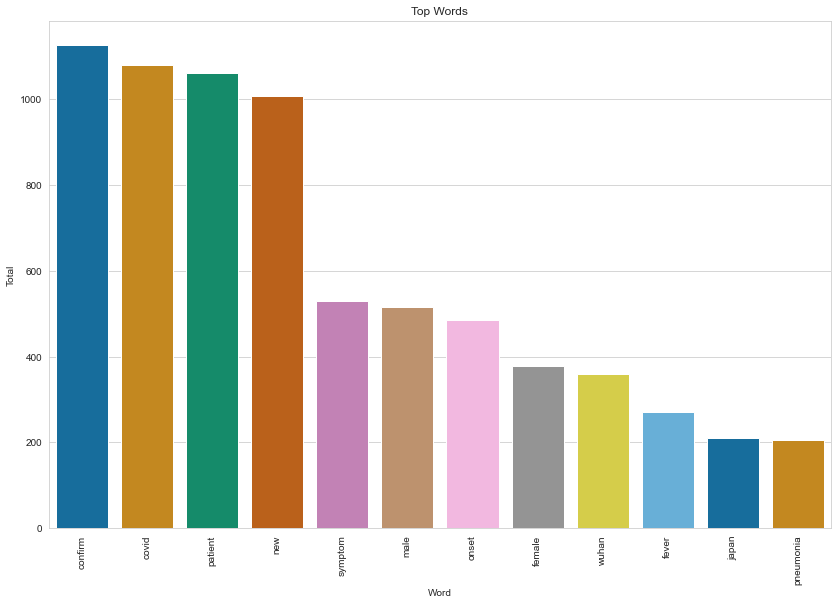

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# visualize the top occuring words post cleaning
def top_words(count, vectorize):
    import matplotlib.pyplot as plt
    word = vectorize.get_feature_names()
    total = np.zeros(len(word))
    for t in count:
        total+=t.toarray()[0]
    
    dict_count = (zip(word, total))
    dict_count = sorted(dict_count, key=lambda x:x[1], reverse=True)[0:12]
    word = [w[0] for w in dict_count]
    counts = [w[1] for w in dict_count]
    x_pos = np.arange(len(word)) 
    
    plt.figure(2, figsize=(14, 14/1.5))
    plt.subplot(title='Top Words')
    sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='colorblind')
    plt.xticks(x_pos, word, rotation=90) 
    plt.xlabel('Word')
    plt.ylabel('Total')
    plt.show()

vectorize = CountVectorizer(stop_words='english')
count = vectorize.fit_transform(data)
top_words(count, vectorize)

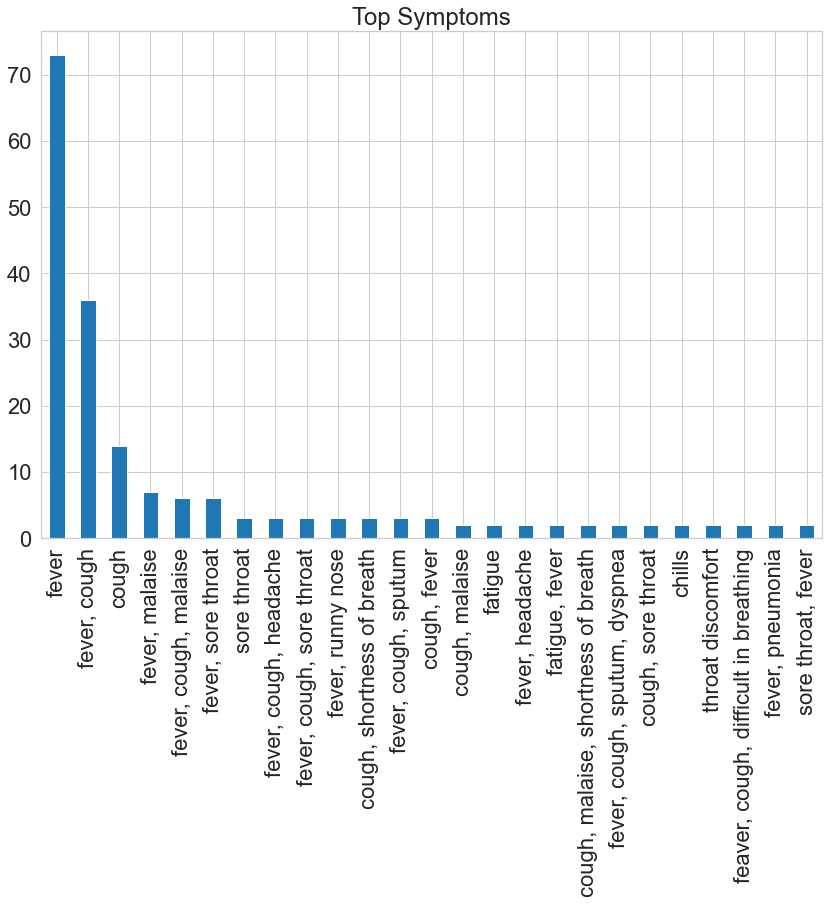

In [21]:
plt.figure(2, figsize=(14, 14/1.5))
plt.title("Top Symptoms")
df1['symptom'].value_counts()[:25].plot('bar')

In [22]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
lyr_words = list(sent_to_words(data))

In [23]:
# bigram and trigram models
bigram = gensim.models.Phrases(lyr_words, min_count=8, threshold=100)
trigram = gensim.models.Phrases(bigram[lyr_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# output test
print(trigram_mod[bigram_mod[lyr_words[0]]])

['first', 'confirm', 'import', 'covid', 'pneumonia', 'patient', 'shenzhen', 'wuhan', 'male', 'shenzheng', 'residence', 'visit', 'relative', 'wuhan', 'symptom', 'onset', 'return', 'shenzhen', 'seek', 'medical', 'care', 'hospitalize', 'sample', 'send', 'china', 'cdc', 'test', 'confirm', 'medical', 'observation', 'contact', 'trace', 'ongoing']


In [24]:
"""https://spacy.io/api/annotation"""

def bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [25]:
# bigrams
lyr_bigrams = bigrams(lyr_words)
lyr_bigrams
# lemmatization
lyr_lemmatized = lemmatization(lyr_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])
print(lyr_lemmatized[:1])

[['first', 'confirm', 'visit', 'return', 'seek', 'medical', 'care', 'hospitalize', 'send', 'confirm', 'medical', 'observation', 'contact', 'trace', 'ongoing']]


In [26]:
for i in range(len(lyr_lemmatized)):
    lyr_lemmatized[i] = ' '.join(lyr_lemmatized[i])
    
df_sum['clean'] = lyr_lemmatized
df_sum.head()

,summary,country,clean
0,First confirmed imported COVID-19 pneumonia pa...,China,first confirm visit return seek medical care h...
1,First confirmed imported COVID-19 pneumonia pa...,China,first confirm patient arrive
2,First confirmed imported cases in Zhejiang: pa...,China,first confirm case hospitalize deliver test po...
3,new confirmed imported COVID-19 pneumonia in T...,China,age recently visit visit immediately
4,new confirmed imported COVID-19 pneumonia in T...,China,visit fever clinic


In [27]:
cleaned = df_sum.clean.to_string()

In [28]:
# overall sentiment of all lyrics
# textblob uses a lookup dictionary for sentiment and subjectivity 
TextBlob(cleaned).sentiment

Sentiment(polarity=0.04314527577685474, subjectivity=0.24280912070385743)

In [29]:
tb = textblob.TextBlob(df_sum.clean[0])
tb.sentiment_assessments

Sentiment(polarity=0.08333333333333333, subjectivity=0.1111111111111111, assessments=[(['first'], 0.25, 0.3333333333333333, None), (['medical'], 0.0, 0.0, None), (['medical'], 0.0, 0.0, None)])

In [30]:
# naive bayes sentiment classification, sentiment probabilities
nb = textblob.en.sentiments.NaiveBayesAnalyzer()
nb.analyze(df_sum.clean[0])

Sentiment(classification='pos', p_pos=0.8994512688346049, p_neg=0.10054873116539298)

In [42]:
# rule based method for sentiment analysis
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(df_sum.clean[0])

{'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'compound': 0.4939}

In [43]:
def sentiment_score(clean_summary):
    score = analyzer.polarity_scores(clean_summary)
    weight = score['compound']
    if weight >= 0.1:
        return 1
    elif (weight < 0.1) and (weight > -0.1):
        return 0
    else:
        return -1

In [44]:
sentiment_score(df_sum.clean[0])

1

In [46]:
df_sum.head()

,summary,country,clean
0,First confirmed imported COVID-19 pneumonia pa...,China,first confirm visit return seek medical care h...
1,First confirmed imported COVID-19 pneumonia pa...,China,first confirm patient arrive
2,First confirmed imported cases in Zhejiang: pa...,China,first confirm case hospitalize deliver test po...
3,new confirmed imported COVID-19 pneumonia in T...,China,age recently visit visit immediately
4,new confirmed imported COVID-19 pneumonia in T...,China,visit fever clinic


In [53]:
sent = [TextBlob(summary) for summary in clean_summary]
sent[0].polarity, sent[0]

val_sentiment = [[summary.sentiment.polarity, str(summary)] for summary in sent]
val_sentiment[0]

df_sentiment = sum.DataFrame(val_sentiment, columns=["polarity", "clean_summary"])
df_sentiment.head()

AttributeError: 'builtin_function_or_method' object has no attribute 'DataFrame'

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 7))

# polarity histogram
df_sentiment.hist(bins=12,ax=ax)

plt.title("Sentiments of Patient Summary")
plt.xlabel("Sentiment Score")
plt.ylabel("Number of Summaries")
plt.show()

In [ ]:
summary = df1.filter(['summary','country','gender','age','death','recovered'], axis=1)
summary.head()